# Ejercicio práctico de regresión lineal simple

En esta prácticq vamos a intar conocer los valores del "intercepto" y la "pendiente".

Vamos  buscar los mejores valores de b0 y b1 para la regresion lineal simple.

y = b0 + b1*x

In [5]:
import numpy as np

## Creamos un set de datos

Para esto creamos un conjunto de datos que se relacionen: 

In [6]:
x = np.arange(1,300,1) #(arange(start, stop, step)
print(f"x 5 sample:  {x[:5]}, x shape {x.shape}, x type: {type(x)}")


x 5 sample:  [1 2 3 4 5], x shape (299,), x type: <class 'numpy.ndarray'>


In [7]:
# Creamos una variable y relacionada con x:

y = np.arange(11,310,1)
print(f"Y 5 samples: {y[:5]}, y shape: {y.shape}, y type: {type(y)}")

Y 5 samples: [11 12 13 14 15], y shape: (299,), y type: <class 'numpy.ndarray'>


## Visualizar los datos

In [8]:
import matplotlib.pyplot as plt


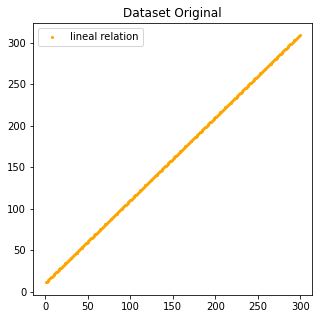

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,c ="orange", s=4, label="lineal relation")
plt.legend()
plt.title("Dataset Original");

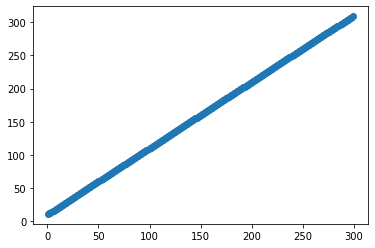

In [10]:
plt.scatter(x,y)

## Separar los **datos**

Separar los datos para entrenar un modelo, por lo general se utiliza el **80%** del total del dataset.

Para validar el modelo durante el entrenamiento se usa el **10%** del total restante. 

Para testar el modelo durante el entrenamiento usaremos el **10%** restante.

In [11]:
split = int(len(x)*0.8)
split

239

In [12]:
test = int(len(x)-split)
validacion = test//2

In [13]:
#Separamos los datos de la variable x
x_train = x[:split] #tomo en cuenta todo hasta el valor de split [1,2.....,239]
x_validacion = x[split:(split+validacion)]
x_test = x[split+validacion:]
print(x_train.shape, x_validacion.shape, x_test.shape)

(239,) (30,) (30,)


In [14]:
#Separamos los datos de la variable y
y_train = y[:split] #tomo en cuenta todo hasta el valor de split [1,2.....,239]
y_validacion = y[split:(split+validacion)]
y_test = y[split+validacion:]
print(y_train.shape, y_validacion.shape, y_test.shape)

(239,) (30,) (30,)


##Visualizar el dataset procesado

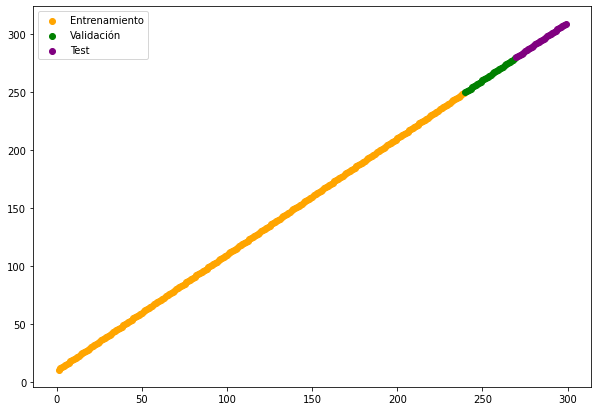

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, c="orange", label="Entrenamiento")
plt.scatter(x_validacion, y_validacion, c="green", label="Validación")
plt.scatter(x_test, y_test, c="purple", label="Test")
plt.legend();

## Que pasa cuando los datos no son lineales y separamos de forma estructurada los datos?

##Separamos los datos en forma randonizada

El método de separación de datos en entrenamiento, test y validación en sklearn no es posible. Solo permite separar en entrenamiento y test. Si quiero tener un conjunto de validación tengo que repetir el método de de sklearn y obtener otro conjunto de entrenamiento y test, solo que esta vez lo puedo tomar como validación . --> entrenamiento, validación y testeo.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) #random_state sirve para repetir lo mismos valores cada vez que se ejecute la celda.

In [18]:
print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_train.shape)

Train set:  (239,) (239,)
Test set:  (60,) (239,)


##Visualizamos como quedan los datos separados en forma randonizada.

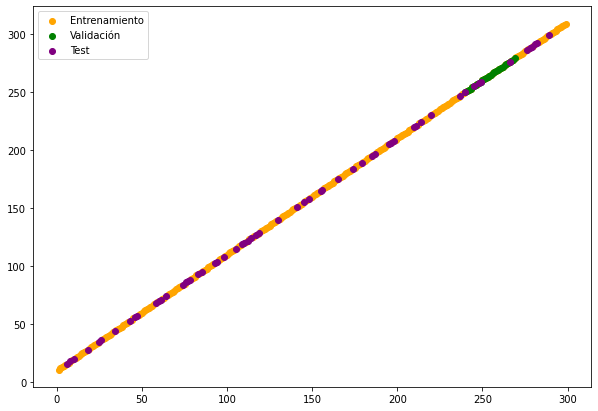

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, c="orange", label="Entrenamiento")
plt.scatter(x_validacion, y_validacion, c="green", label="Validación")
plt.scatter(x_test, y_test, c="purple", label="Test")
plt.legend();

##Armamos nuestro modelo de regresión lineal simple

Vamos a implementar la regresión de OLS (mínimos cuadrados ordinarios)

Esto lo vamos a hacer con sklearn.

Para entrenar el modelo usamos el método .fit()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_model = LinearRegression()


In [22]:
x_train.reshape(-1,1).shape

(239, 1)

In [23]:
linear_model.fit(x_train.reshape(-1,1),y_train.reshape(-1,1)) #el formato que requiere el método es x_train = (n_samples, n_features)

LinearRegression()

In [24]:
#Un modelo de regresión busca valores, b0 y b1
#Para ver esos valores que aproximó el modelo LinearRegresion usamos los atributos .coef_   y   .intercept_

linear_model.coef_, linear_model.intercept_






(array([[1.]]), array([10.]))

In [25]:
# Predecir usando esos valores de b0 y b1 que el modelo aproximó
y_pred = linear_model.predict(x_test.reshape(-1,1))

# Predecir usando esos valores de b0 y b1 que el modelo aproximó.


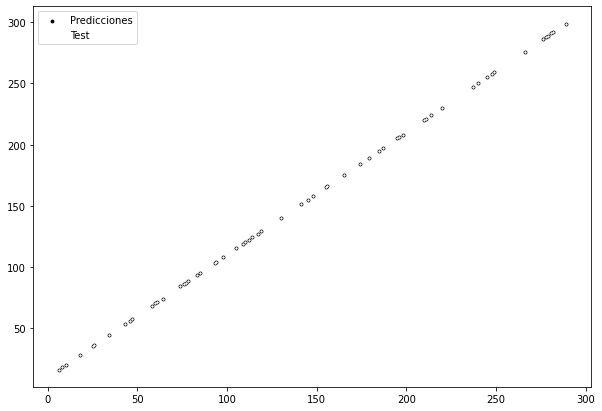

In [30]:
y_pred = linear_model.predict(x_test.reshape(-1,1))
y_pred.shape
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_pred.squeeze(),c='black',s=8,label='Predicciones')
plt.scatter(x_test,y_test,c='white',s=2,label='Test')
plt.legend();